## 6. Estudo da quação de Laplace

([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/956%5Bsec10-8%5D/3:17%5Bpla%2Cce%5D)) Uma das equações diferenciais parciais mais importantes que ocorrem em Matemática aplicada está associada ao nome de Laplace em duas dimensões, a equação é

$$
u_{x x}+u_{y y}=0
$$

e, em três dimensões,

$$
u_{x x}+u_{y y}+u_{z z}=0
$$

Por exemplo, em um problema de calor a duas dimensões espaciais, a temperatura $u(x, y, t)$ tem de satisfazer a equação diferencial
$$
\alpha^2\left(u_{x x}+u_{y y}\right)=u_t
$$

em que $\alpha^2$ é a difusividade térmica. Se existir um estado estacionário, então a derivada em relação ao tempo desaparece e u só depende de x e y

A equação de Laplace aparece em várias áreas da física por descrever potenciais em sistemas sem fontes. Ela rege o potencial elétrico em meios dielétricos sem cargas, o potencial gravitacional de partículas livres, o movimento irrotacional e estacionário de fluidos incompressíveis e não viscosos (função potencial de velocidade e função de fluxo) e a função de deformação em problemas de elasticidade, como na torção de barras. A equação de Laplace também é conhecida como equação do potencial.

**Problema de Dirichlet em um Retângulo** 

(Fonte: [Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1036/2/2))
Problema matemático de encontrar a função $u$ que satisfaz a equação de Laplace $u_{x x}+u_{y y}=0$ no retângulo $0<x<a, 0<y<b$, e satisfaz também as condições de contorno

$$\begin{array}{lll}u(x, 0)=0, & u(x, b)=0, & 0<x<a, \\ u(0, y)=0, & u(a, y)=f(y), & 0<y<b,\end{array}$$

em que $f$ é uma função dada em $0<y<b$.

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/dirichlet.png?raw=true" width="380">

Figura 6.1. Problema de Dirichlet em um retângulo.

Para obter uma solução analitica, vamos supor que 

$$
u(x, y)=X(x) Y(y)
$$

Substituindo na equação, obtemos

$$
\frac{X^{\prime \prime}}{X}=-\frac{Y^{\prime \prime}}{Y}=\lambda
$$

em que $\lambda$ é a constante de separação. Obtemos, assim, duas equações diferenciais ordinárias

$$
X^{\prime \prime}-\lambda X=0 \quad (0<x<a)  \quad \text{e}  \quad 
Y^{\prime \prime}+\lambda Y=0 \quad (0<y<b)
$$

Substituindo $u$ nas condições de contorno homogêneas, encontramos

$$
X(0)=0,  \quad 
Y(0)=0 \quad \text{e} \quad Y(b)=0 .
$$


Primeiro, determinaremos a solução da equação diferencial $Y^{\prime \prime}+\lambda Y=0$ sujeita às condições de contorno $Y(0)=0$ e $Y(b)=0$. Concluímos que existirão soluções não triviais se, e somente se, $\lambda$ for um autovalor, a saber,

$$
\lambda=\left(\frac{n \pi}{b}\right)^2, \quad n=1,2, \ldots
$$

e $Y(y)$ for proporcional à autofunção correspondente $\operatorname{sen}(n \pi y / b)$. A seguir, vamos substituir $\lambda$ na em $X$ obtendo

$$
X^{\prime \prime}-\left(\frac{n \pi}{b}\right)^2 X=0
$$

Para resolver esta equação sujeita à condição de contorno $X(0)=0$, é conveniente escrever a solução geral como

$$
X(x)=k_1 \cosh \left(\frac{n \pi x}{b}\right)+k_2 \operatorname{senh}\left(\frac{n \pi x}{b}\right) .
$$A condição de contorno $X(0)=0$ implica que $k_1=0$. Logo, $X(x)$ tem de ser proporcional a $\operatorname{senh}(n \pi x / b)$. Obtemos, assim, as soluções fundamentais

$$
u_n(x, y)=\operatorname{senh}\left(\frac{n \pi x}{b}\right) \operatorname{sen}\left(\frac{n \pi y}{b}\right), \quad n=1,2, \ldots
$$



Essas funções satisfazem a equação diferencial e as condições de contorno homogêneas para cada valor de $n$. Para satisfazer o restante da condição de contorno não homogênea em $x=a$, vamos supor, como de hábito, que podemos representar a solução $u(x, y)$ na forma

$$
u(x, y)=\sum_{n=1}^{\infty} c_n u_n(x, y)=\sum_{n=1}^{\infty} c_n \operatorname{senh}\left(\frac{n \pi x}{b}\right) \operatorname{sen}\left(\frac{n \pi y}{b}\right) .
$$

Então, as quantidades $c_n \operatorname{senh}(n \pi a / b)$ têm de ser os coeficientes da série de Fourier em senos de $f$ de período $2 b$ e são dados por

$$
c_n \operatorname{senh}\left(\frac{n \pi a}{b}\right)=\frac{2}{b} \int_0^b f(y) \operatorname{sen}\left(\frac{n \pi y}{b}\right) d y
.$$

**Exemplo 1:** Vamos aqui usar o SymPy para estudar a solução analítica  

In [71]:
import sympy as sp
sp.init_printing()

In [72]:
x, y, a, b = sp.symbols('x, y, a, b')
n = sp.symbols('n', integer=True, positive = True)
u = sp.Function('u')(x, y)
X = sp.Function('X')(x)
Y = sp.Function('Y')(y)

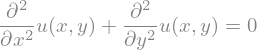

In [73]:
edp = sp.Eq(sp.Derivative(u, x, 2) + sp.Derivative(u, y, 2), 0)
edp

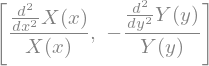

In [74]:
sp.pde_separate(edp, u, [X, Y], strategy='mul')

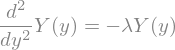

In [75]:
lamb = sp.symbols('lambda', real=True, positive=True)
eqY = sp.Eq(sp.Derivative(Y, y, 2),-lamb * Y)
display(eqY)

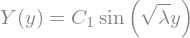

In [76]:
Ysol = sp.dsolve(eqY, Y, ics={Y.subs(y,0): 0})
Ysol

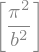

In [77]:
sp.solve(sp.Eq(0, Ysol.rhs.subs(y,b)), lamb)

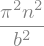

In [78]:
lamb = (n*sp.pi/b)**2
lamb

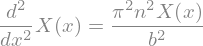

In [79]:
eqX = sp.Eq(sp.Derivative(X, x, 2),lamb * X)
display(eqX)

In [80]:
Xsol = sp.dsolve(eqX, X, ics={X.subs(x,0): 0})
Xsol

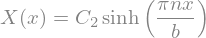

In [81]:
sp.Eq(Xsol.lhs,sp.simplify(Xsol.rhs/2).rewrite(sp.sinh)) 

Assim, escrevemos 
$$
u(x, y)=\sum_{n=1}^{\infty} c_n \operatorname{senh}\left(\frac{n \pi x}{b}\right) \operatorname{sen}\left(\frac{n \pi y}{b}\right) 
$$
com
$$
c_n \operatorname{senh}\left(\frac{n \pi a}{b}\right)=\frac{2}{b} \int_0^b f(y) \operatorname{sen}\left(\frac{n \pi y}{b}\right) d y
$$

**Exemplo 2:** (Fonte: [Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1054/2%5Bexe10-8-1%5D/1:12%5B0.8%2C.1%5D)) Encontre a solução para o problema de Dirichlet 
$$
u_{x x}+u_{y y}=0
$$

$$\begin{array}{lll}u(x, 0)=0, & u(x, 2)=0, & 0<x<3, \\ u(0, y)=0, & u(3, y)=f(y), & 0<y<2, \end{array}$$

sendo

$$
f(y)= \begin{cases}y, & 0 \leq y \leq 1 \\ 2-y, & 1 \leq y \leq 2\end{cases} 
$$

In [193]:
x, y = sp.symbols('x, y')

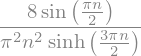

In [194]:
cn = (1/sp.sinh(n*sp.pi*3/2))*\
     (sp.integrate(y*sp.sin(n*sp.pi*y/2),(y,0,1)) +\
       sp.integrate((2-y)*sp.sin(n*sp.pi*y/2),(y,1,2)))
cn

In [195]:
cn = sp.lambdify(n,cn)

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [221]:
# definindo uma aproximação para a solução analítica com n_max termos
def u_aprox(x, y):
  soma = 0
  for n in range(1, 100):
    soma += cn(n)*np.sinh(n*np.pi*x/2)*np.sin(n*np.pi*y/2)
  return soma

In [222]:
u_aprox(1, 1)


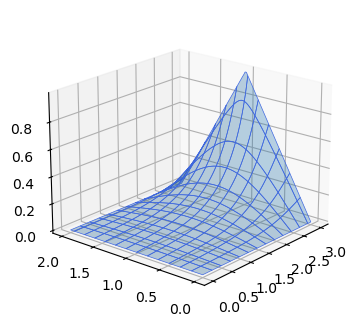

In [223]:
# definindo as coordenadas dos pontos do gráfico
x = np.linspace(0, 3, 100)
y = np.linspace(0, 2, 100)
xx, yy = np.meshgrid(x, y)
zz = u_aprox(xx, yy)

# plotando a superfície 3D
ax = plt.figure(figsize=(4, 4)).add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax.view_init(20, -140)
plt.show()

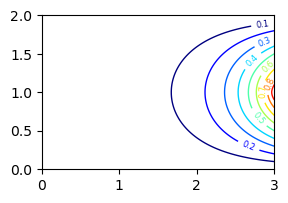

In [224]:
plt.figure(figsize=(3,2))
levels = list(np.linspace(0.1,1,10))

#plt.contourf(xx, yy, zz, cmap='jet')
c = plt.contour(xx, yy, zz, levels, cmap='jet',linewidths=1)
plt.clabel(c, inline=1, fontsize=6)

plt.show()

**Exercício 1:**
Obtenha a solução analítica para a equação de Laplace em $[0, 2]\times[0, 2]$ com as condições de fronteira

$$ T(0, y) = 0,\quad\quad T(2, y) = sen(\pi y),\quad\quad\text{para}\ \ 0 < y < 2, $$
$$ T(x, 0) = 0,\quad\quad T(x, 2) = 0,\quad\quad\text{para}\ \ 0 < x < 2$$

e plote o gráfico de sua aproximação truncando a série de Fourier em $n_{max}=100$.

In [12]:
# resolva

**Exercício 2:** 
Obtenha a solução analítica para a equação de Laplace em $[0, 4]\times[0, 4]$ com as condições de fronteira

$$ T(0, y) = 2y,\quad\quad T(4, y) = y^2-5,\quad\quad\text{para}\ \ 0 < y < 4, $$
$$ T(x, 0) = 0,\quad\quad T(x, 4) = 0,\quad\quad\text{para}\ \ 0 < x < 4$$

e plote o gráfico de sua aproximação truncando a série de Fourier em $n_{max}=200$.

In [13]:
# resolva

**Exercício 3:** Encontre o potencial no retângulo $0 \leqq x \leqq 20,0 \leqq y \leqq 40$ cujo lado superior é mantido no potencial de 220 V , estando os outros lados aterrados.



**Exercício 4:** Encontre o potencial no quadrado $0 \leqq x \leqq 2,0 \leqq y \leqq 2$ cujo lado superior é mantido no potencial de $\operatorname{sen} \frac{1}{2} \pi x$, estando os outros lados aterrados.

### Referências 

BOYCE, William E.; DIPRIMA, Richard C.; MEADE, Douglas B. Equacoes Diferenciais Elementares e Problemas de Valores de Contorno. 12. ed. Rio de Janeiro: LTC, 2024.

KREYSZIG, Erwin. Matemática Superior para Engenharia. 10. ed. Rio de Janeiro: LTC, 2011.
